# U.S. Census Demo

In [128]:
# Dependencies
import requests
import pandas as pd
from census import Census
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st



In [129]:

# Obtained from: https://www.zillow.com/browse/homes/il/cook-county/
zip_df = pd.read_csv("ChicagoZips.csv", encoding="utf-8")


store_df=pd.read_csv("Grocery_Store_Status_UseMe.csv" , encoding="utf-8")
store_df[["Zipcode","Zipcode_long"]]=store_df.Zip_long.str.split("-",expand=True)

store_df["Zipcode"]=store_df["Zipcode"].astype("int64")
store_df=store_df[store_df["New status"]=="OPEN"]


covid_df = pd.read_csv("COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code.csv", encoding="utf-8")

covid_df= covid_df.rename(columns = {"ZIP Code": "Zipcode"})

covid_df = covid_df[(covid_df["Zipcode"].str.contains("Unknown"))==False]


covid_df["Zipcode"]=covid_df["Zipcode"].astype("int64")
covid_df=covid_df.dropna(how="any")
covid_df.head()


,Zipcode,Week_Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
0,60601,17,4/19/2020,4/25/2020,7.0,45.0,48.0,306.6,35.0,198,...,1349.2,0.1,0.1,1,2,6.8,13.6,14675,60601-2020-17,POINT (-87.622844 41.886262)
1,60601,38,9/13/2020,9/19/2020,7.0,204.0,48.0,1390.1,325.0,5653,...,38521.3,0.0,0.0,0,5,0.0,34.1,14675,60601-2020-38,POINT (-87.622844 41.886262)
2,60601,40,9/27/2020,10/3/2020,5.0,218.0,34.0,1485.5,393.0,6436,...,43856.9,0.0,0.0,0,6,0.0,40.9,14675,60601-2020-40,POINT (-87.622844 41.886262)
3,60601,41,10/4/2020,10/10/2020,7.0,225.0,48.0,1533.2,433.0,6869,...,46807.5,0.0,0.0,0,6,0.0,40.9,14675,60601-2020-41,POINT (-87.622844 41.886262)
4,60601,43,10/18/2020,10/24/2020,29.0,290.0,198.0,1976.1,580.0,8221,...,56020.4,0.0,0.0,0,7,0.0,47.7,14675,60601-2020-43,POINT (-87.622844 41.886262)


In [130]:
cases=covid_df.groupby(["Zipcode"])["Cases - Cumulative"].max()
tests=covid_df.groupby(["Zipcode"])["Tests - Cumulative"].max()
deaths=covid_df.groupby(["Zipcode"])["Deaths - Cumulative"].max()

covid_comps=pd.DataFrame({"Total Covid Cases": cases,
                          "Total Covid Tests": tests,
                          "Total Covid Deaths": deaths
})
covid_comps

,Total Covid Cases,Total Covid Tests,Total Covid Deaths
Zipcode,,,
60601,5599.0,104433,15
60602,489.0,12516,3
60603,437.0,12056,0
60604,477.0,15782,0
60605,7628.0,138839,15
60606,1215.0,34077,9
60607,9218.0,193565,19
60608,20805.0,395580,203
60609,17454.0,345345,233


In [131]:

store_count_df=store_df.groupby("Zipcode").count()
#store_count_df

In [132]:

store_count_df=store_count_df[["Address"]]
store_count_df= store_count_df.rename(columns = {"Address": "Store Count"})
#store_count_df

In [133]:
# Import U.S. Census API Key
from config import api_key

# Create an instance of the Census library
c = Census(
    api_key,
    year = 2020
)


## Retrieve data from the U.S. Census using the Census library

References:

* Review the following page to review the Python library documentation: <https://github.com/CommerceDataService/census-wrapper>

* Review the following page to learn more about the data labels: <https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b>

In [134]:
# Run Census Search to retrieve data on all zip codes 
census_data = c.acs5.get(
    (
        "NAME",
        "B19013_001E",
        "B01003_001E",
        "B01002_001E",
        "B19301_001E",
        "B17001_002E",
        "B15003_002E",
        "B15003_017E",
        "B15003_018E", 
        "B15003_022E", 
        "B23025_004E",
        "B23025_005E"


    ),
    {'for': 'zip code tabulation area:*'}
)
#census_data

In [135]:

# Convert to DataFrame
census_df = pd.DataFrame(census_data)
census_df=census_df.rename(columns={"zip code tabulation area": "zip_codes"})
census_df

,NAME,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E,B15003_002E,B15003_017E,B15003_018E,B15003_022E,B23025_004E,B23025_005E,zip_codes
0,ZCTA5 29590,30985.0,3543.0,39.1,13288.0,869.0,65.0,721.0,440.0,162.0,1104.0,46.0,29590
1,ZCTA5 93306,54450.0,74296.0,31.3,23580.0,15853.0,1641.0,10337.0,1718.0,5098.0,28717.0,2379.0,93306
2,ZCTA5 93660,39625.0,4082.0,26.7,12475.0,1057.0,117.0,464.0,56.0,52.0,1313.0,229.0,93660
3,ZCTA5 93110,93264.0,15777.0,46.9,53375.0,1332.0,150.0,1686.0,293.0,3405.0,7692.0,286.0,93110
4,ZCTA5 93212,42983.0,22596.0,34.4,10656.0,3911.0,396.0,3256.0,1339.0,515.0,4484.0,575.0,93212
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,ZCTA5 16623,51667.0,552.0,54.9,26369.0,80.0,5.0,168.0,18.0,29.0,201.0,18.0,16623
33116,ZCTA5 16627,45000.0,2118.0,44.6,24699.0,324.0,4.0,780.0,83.0,135.0,988.0,124.0,16627
33117,ZCTA5 16634,51500.0,315.0,46.1,25084.0,24.0,0.0,111.0,8.0,16.0,127.0,19.0,16634
33118,ZCTA5 16640,55982.0,707.0,48.6,28335.0,167.0,2.0,220.0,62.0,79.0,266.0,12.0,16640


In [136]:
census_df["zip_codes"]=census_df["zip_codes"].astype("int64")

census_df

,NAME,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E,B15003_002E,B15003_017E,B15003_018E,B15003_022E,B23025_004E,B23025_005E,zip_codes
0,ZCTA5 29590,30985.0,3543.0,39.1,13288.0,869.0,65.0,721.0,440.0,162.0,1104.0,46.0,29590
1,ZCTA5 93306,54450.0,74296.0,31.3,23580.0,15853.0,1641.0,10337.0,1718.0,5098.0,28717.0,2379.0,93306
2,ZCTA5 93660,39625.0,4082.0,26.7,12475.0,1057.0,117.0,464.0,56.0,52.0,1313.0,229.0,93660
3,ZCTA5 93110,93264.0,15777.0,46.9,53375.0,1332.0,150.0,1686.0,293.0,3405.0,7692.0,286.0,93110
4,ZCTA5 93212,42983.0,22596.0,34.4,10656.0,3911.0,396.0,3256.0,1339.0,515.0,4484.0,575.0,93212
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,ZCTA5 16623,51667.0,552.0,54.9,26369.0,80.0,5.0,168.0,18.0,29.0,201.0,18.0,16623
33116,ZCTA5 16627,45000.0,2118.0,44.6,24699.0,324.0,4.0,780.0,83.0,135.0,988.0,124.0,16627
33117,ZCTA5 16634,51500.0,315.0,46.1,25084.0,24.0,0.0,111.0,8.0,16.0,127.0,19.0,16634
33118,ZCTA5 16640,55982.0,707.0,48.6,28335.0,167.0,2.0,220.0,62.0,79.0,266.0,12.0,16640


In [137]:
chicago = pd.merge(zip_df, census_df, on="zip_codes", how = "left")
chicago

,zip_codes,NAME,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E,B15003_002E,B15003_017E,B15003_018E,B15003_022E,B23025_004E,B23025_005E
0,60629,ZCTA5 60629,43372.0,107930.0,31.3,19159.0,20230.0,2884.0,22274.0,3191.0,5066.0,44200.0,6800.0
1,60618,ZCTA5 60618,85443.0,94646.0,34.4,47550.0,8382.0,1433.0,10468.0,1541.0,20699.0,55629.0,2595.0
2,60639,ZCTA5 60639,51810.0,88515.0,34.6,21614.0,15257.0,3288.0,14583.0,2615.0,5237.0,41757.0,2897.0
3,60647,ZCTA5 60647,82433.0,85658.0,32.2,51166.0,10750.0,1095.0,9665.0,1417.0,22694.0,55264.0,1961.0
4,60804,ZCTA5 60804,53750.0,81505.0,31.7,20059.0,11115.0,2469.0,14306.0,2239.0,3894.0,37960.0,1871.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,60677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,60678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,60681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,60680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
# Need to remove NaN -- not all zip codes listed in zillow are recognized by the census. Those zip codes likely are considered part of a bigger neighboring zip. Therefore, dropping any that is missing census data. 
chicago=chicago.dropna(thresh=2)


In [139]:

# Column renaming
chicago = chicago.rename(
    columns = {
        "B01003_001E": "Population",
        "B01002_001E": "Median Age",
        "B19013_001E": "Household Income",
        "B19301_001E": "Per Capita Income",
        "B17001_002E": "Poverty Count",
        "NAME": "Name",
        "zip_codes": "Zipcode",
        "B15003_002E":	"Education_none",
        "B15003_017E":	"education_high_sc",
        "B15003_018E":	"education_ged",
        "B15003_022E":	"education_bachelor",
        "B23025_004E":	"employment_employed",
        "B23025_005E":	"employment_unemployed"


    }
)

chicago

,Zipcode,Name,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Education_none,education_high_sc,education_ged,education_bachelor,employment_employed,employment_unemployed
0,60629,ZCTA5 60629,43372.0,107930.0,31.3,19159.0,20230.0,2884.0,22274.0,3191.0,5066.0,44200.0,6800.0
1,60618,ZCTA5 60618,85443.0,94646.0,34.4,47550.0,8382.0,1433.0,10468.0,1541.0,20699.0,55629.0,2595.0
2,60639,ZCTA5 60639,51810.0,88515.0,34.6,21614.0,15257.0,3288.0,14583.0,2615.0,5237.0,41757.0,2897.0
3,60647,ZCTA5 60647,82433.0,85658.0,32.2,51166.0,10750.0,1095.0,9665.0,1417.0,22694.0,55264.0,1961.0
4,60804,ZCTA5 60804,53750.0,81505.0,31.7,20059.0,11115.0,2469.0,14306.0,2239.0,3894.0,37960.0,1871.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,60602,ZCTA5 60602,226276.0,1596.0,34.0,193919.0,10.0,0.0,0.0,0.0,536.0,1429.0,5.0
174,60603,ZCTA5 60603,140125.0,1186.0,33.3,122475.0,111.0,0.0,0.0,0.0,392.0,725.0,49.0
175,60604,ZCTA5 60604,58558.0,729.0,32.3,81253.0,209.0,0.0,0.0,0.0,115.0,457.0,68.0
176,60029,ZCTA5 60029,201989.0,512.0,46.0,92595.0,18.0,0.0,27.0,10.0,124.0,220.0,11.0


In [140]:
chicago=chicago.merge(store_count_df, on="Zipcode", how = "left")

In [141]:
chicago=chicago.dropna(how="any")
chicago.head()

,Zipcode,Name,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Education_none,education_high_sc,education_ged,education_bachelor,employment_employed,employment_unemployed,Store Count
0,60629,ZCTA5 60629,43372.0,107930.0,31.3,19159.0,20230.0,2884.0,22274.0,3191.0,5066.0,44200.0,6800.0,9.0
1,60618,ZCTA5 60618,85443.0,94646.0,34.4,47550.0,8382.0,1433.0,10468.0,1541.0,20699.0,55629.0,2595.0,9.0
2,60639,ZCTA5 60639,51810.0,88515.0,34.6,21614.0,15257.0,3288.0,14583.0,2615.0,5237.0,41757.0,2897.0,14.0
3,60647,ZCTA5 60647,82433.0,85658.0,32.2,51166.0,10750.0,1095.0,9665.0,1417.0,22694.0,55264.0,1961.0,14.0
4,60804,ZCTA5 60804,53750.0,81505.0,31.7,20059.0,11115.0,2469.0,14306.0,2239.0,3894.0,37960.0,1871.0,1.0


In [142]:
chicago=chicago.merge(covid_comps, on="Zipcode", how = "left")
chicago=chicago.dropna(how="any")
chicago.head()


,Zipcode,Name,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Education_none,education_high_sc,education_ged,education_bachelor,employment_employed,employment_unemployed,Store Count,Total Covid Cases,Total Covid Tests,Total Covid Deaths
0,60629,ZCTA5 60629,43372.0,107930.0,31.3,19159.0,20230.0,2884.0,22274.0,3191.0,5066.0,44200.0,6800.0,9.0,35080.0,531884.0,359.0
1,60618,ZCTA5 60618,85443.0,94646.0,34.4,47550.0,8382.0,1433.0,10468.0,1541.0,20699.0,55629.0,2595.0,9.0,25592.0,475006.0,182.0
2,60639,ZCTA5 60639,51810.0,88515.0,34.6,21614.0,15257.0,3288.0,14583.0,2615.0,5237.0,41757.0,2897.0,14.0,29976.0,456483.0,316.0
3,60647,ZCTA5 60647,82433.0,85658.0,32.2,51166.0,10750.0,1095.0,9665.0,1417.0,22694.0,55264.0,1961.0,14.0,24179.0,474356.0,196.0
5,60632,ZCTA5 60632,46937.0,86715.0,31.4,18927.0,13916.0,2944.0,18401.0,2417.0,4679.0,36258.0,4790.0,10.0,26659.0,441033.0,266.0


In [143]:
chicago["Stores Per Capita"] = (chicago["Store Count"]/chicago["Population"])*100
chicago["Poverty Rate"] = (chicago["Poverty Count"]/chicago["Population"])*100
chicago["Unemployment Rate"] = (chicago["employment_unemployed"]/chicago["Population"])*100
chicago["No Education Rate"] = (chicago["Education_none"]/chicago["Population"])*100
chicago["High School Education Rate"] = (chicago["education_high_sc"]/chicago["Population"])*100
chicago["GED Rate"] = (chicago["education_ged"]/chicago["Population"])*100
chicago["Bachelors Education Rate"] = (chicago["education_bachelor"]/chicago["Population"])*100
chicago["Covid Case Rate"] = (chicago["Total Covid Cases"]/chicago["Population"])*100
chicago["Covid Test Rate"] = (chicago["Total Covid Tests"]/chicago["Population"])*100
chicago["Covid Death Rate"] = (chicago["Total Covid Deaths"]/chicago["Population"])*100
chicago.head()


,Zipcode,Name,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Education_none,education_high_sc,education_ged,...,Stores Per Capita,Poverty Rate,Unemployment Rate,No Education Rate,High School Education Rate,GED Rate,Bachelors Education Rate,Covid Case Rate,Covid Test Rate,Covid Death Rate
0,60629,ZCTA5 60629,43372.0,107930.0,31.3,19159.0,20230.0,2884.0,22274.0,3191.0,...,0.008339,18.743630,6.300380,2.672102,20.637450,2.956546,4.693783,32.502548,492.804596,0.332623
1,60618,ZCTA5 60618,85443.0,94646.0,34.4,47550.0,8382.0,1433.0,10468.0,1541.0,...,0.009509,8.856159,2.741796,1.514063,11.060161,1.628172,21.869915,27.039706,501.876466,0.192296
2,60639,ZCTA5 60639,51810.0,88515.0,34.6,21614.0,15257.0,3288.0,14583.0,2615.0,...,0.015817,17.236627,3.272892,3.714625,16.475174,2.954302,5.916511,33.865447,515.712591,0.357002
3,60647,ZCTA5 60647,82433.0,85658.0,32.2,51166.0,10750.0,1095.0,9665.0,1417.0,...,0.016344,12.549908,2.289337,1.278339,11.283243,1.654253,26.493731,28.227369,553.778982,0.228817
5,60632,ZCTA5 60632,46937.0,86715.0,31.4,18927.0,13916.0,2944.0,18401.0,2417.0,...,0.011532,16.047973,5.523842,3.395030,21.220089,2.787292,5.395837,30.743239,508.600588,0.306752


In [144]:

#making box plots for the 4 quartiles of zip codes by average household income
# create 4 divisions of zip codes by average wealth compared to the other zips
wealth_areas = ["poorest", "second_poorest", "second_wealthiest", "wealthiest"]

wealth_quants = chicago["Household Income"].quantile([.25,.5,.75])
print(wealth_quants)
chicago["Household Income"].max()

#for a zip code whose wealth is between $0 and the limit of Q1, we need them to be labeled as poorest

#for a zip code whose wealth is between the limit of Q1 and the average Chicago household income, 
# we need them to be labeled as second_poorest

#for a zip code whose wealth is between the average Chicago household income and the limit of Q3, 
# we need them to be labeled as second_wealthiest

#for a zip code whose wealth is between the value of q3 and the maximum average household income zip in Chicago, 
# we need them to be labeled as wealthiest

bins = [0, 43439.5, 63889.5, 95676.0, 140125.0]
chicago["Household Income Quartile"] = pd.cut(chicago["Household Income"], bins, labels=wealth_areas)
chicago.head()

#Note: we found there are no outliers for any zip codes' average household incomes.


0.25    43439.5
0.50    63889.5
0.75    95676.0
Name: Household Income, dtype: float64


,Zipcode,Name,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Education_none,education_high_sc,education_ged,...,Poverty Rate,Unemployment Rate,No Education Rate,High School Education Rate,GED Rate,Bachelors Education Rate,Covid Case Rate,Covid Test Rate,Covid Death Rate,Household Income Quartile
0,60629,ZCTA5 60629,43372.0,107930.0,31.3,19159.0,20230.0,2884.0,22274.0,3191.0,...,18.743630,6.300380,2.672102,20.637450,2.956546,4.693783,32.502548,492.804596,0.332623,poorest
1,60618,ZCTA5 60618,85443.0,94646.0,34.4,47550.0,8382.0,1433.0,10468.0,1541.0,...,8.856159,2.741796,1.514063,11.060161,1.628172,21.869915,27.039706,501.876466,0.192296,second_wealthiest
2,60639,ZCTA5 60639,51810.0,88515.0,34.6,21614.0,15257.0,3288.0,14583.0,2615.0,...,17.236627,3.272892,3.714625,16.475174,2.954302,5.916511,33.865447,515.712591,0.357002,second_poorest
3,60647,ZCTA5 60647,82433.0,85658.0,32.2,51166.0,10750.0,1095.0,9665.0,1417.0,...,12.549908,2.289337,1.278339,11.283243,1.654253,26.493731,28.227369,553.778982,0.228817,second_wealthiest
5,60632,ZCTA5 60632,46937.0,86715.0,31.4,18927.0,13916.0,2944.0,18401.0,2417.0,...,16.047973,5.523842,3.395030,21.220089,2.787292,5.395837,30.743239,508.600588,0.306752,second_poorest


Text(0, 0.5, 'Average Household Income in the Zip ($)')

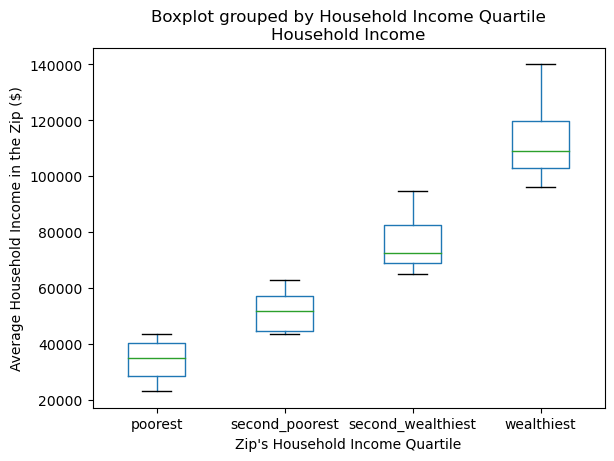

In [145]:
ax = chicago.boxplot(column="Household Income", by = "Household Income Quartile", grid = False)
ax.set_xlabel("Zip's Household Income Quartile")
ax.set_ylabel("Average Household Income in the Zip ($)")

The Regression line is modeled by the equation y = 1.679e-07x + -0.0007651913
The r-value is: 0.44475023404704944
The p-value is: 0.0007531819043198361


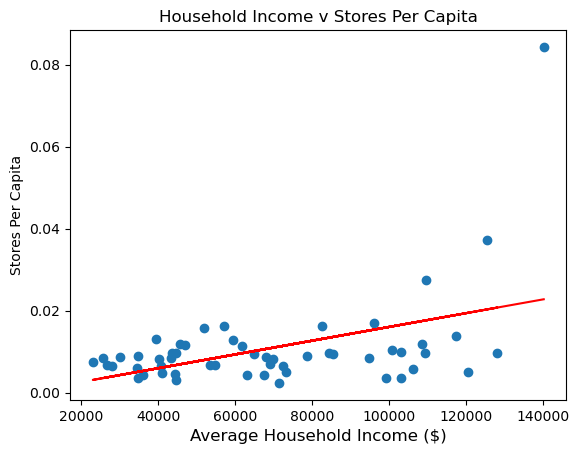

In [146]:
#Now we want to show the relationship between the grocery stores per capita by zip code against
#the average household income of that zip

# generate a scatter plot of the grocery stores per capita by zip code against the average household 
# #income of that zip

plt.scatter(chicago["Household Income"],chicago["Stores Per Capita"])
plt.title('Household Income v Stores Per Capita')
plt.xlabel('Average Household Income ($)',fontsize =12)
plt.ylabel('Stores Per Capita')

#linear regression for store availability
x_values = chicago["Household Income"]
y_values = chicago["Stores Per Capita"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,10)) + "x + " + str(round(intercept,10))

print(f"The Regression line is modeled by the equation {line_eq}")
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

plt.plot(x_values, regress_values, "-r")
plt.savefig("Household Income v Stores Per Capita")


In [147]:
# Save the DataFrame as a CSV
# Note: To avoid any issues later, use encoding="utf-8"
#census_pd.to_csv("census_data.csv", encoding="utf-8", index=False)